In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
#Load the data 
df = pd.read_csv('ZOMATO.csv')

#set the dat as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-07-23,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
2021-07-26,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2021-07-27,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2021-07-28,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
2021-07-29,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
2024-05-15,2024-05-15,188.800003,193.399994,183.149994,192.000000,192.000000,44772997
2024-05-16,2024-05-16,192.899994,195.850006,189.000000,195.199997,195.199997,35478593
2024-05-17,2024-05-17,195.149994,196.000000,193.100006,194.850006,194.850006,20841351
2024-05-21,2024-05-21,194.399994,196.500000,188.750000,189.100006,189.100006,33453174


In [3]:
#Checking for dupicates
df.duplicated().sum().any()

False

In [4]:
#Checking for null value 
df.dropna(inplace=True)
df.isnull().values.any()

False

In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
#checking the general corrlation between all columns and their realtionsships
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.corr(method='spearman'))

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.996530  0.996489  0.993601   0.993601 -0.267053
High       0.996530  1.000000  0.995435  0.997473   0.997473 -0.236714
Low        0.996489  0.995435  1.000000  0.997166   0.997166 -0.281077
Close      0.993601  0.997473  0.997166  1.000000   1.000000 -0.249341
Adj Close  0.993601  0.997473  0.997166  1.000000   1.000000 -0.249341
Volume    -0.267053 -0.236714 -0.281077 -0.249341  -0.249341  1.000000


In [7]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

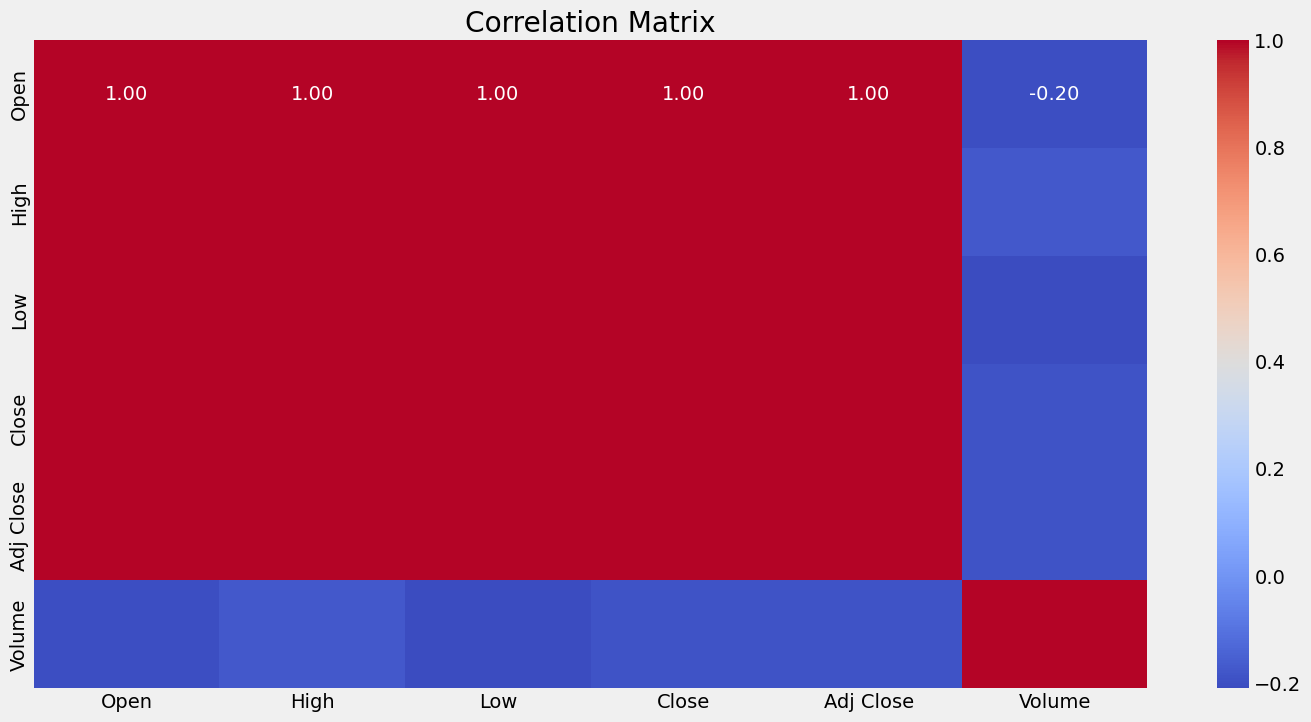

In [8]:
#visualize correlations

# Create heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

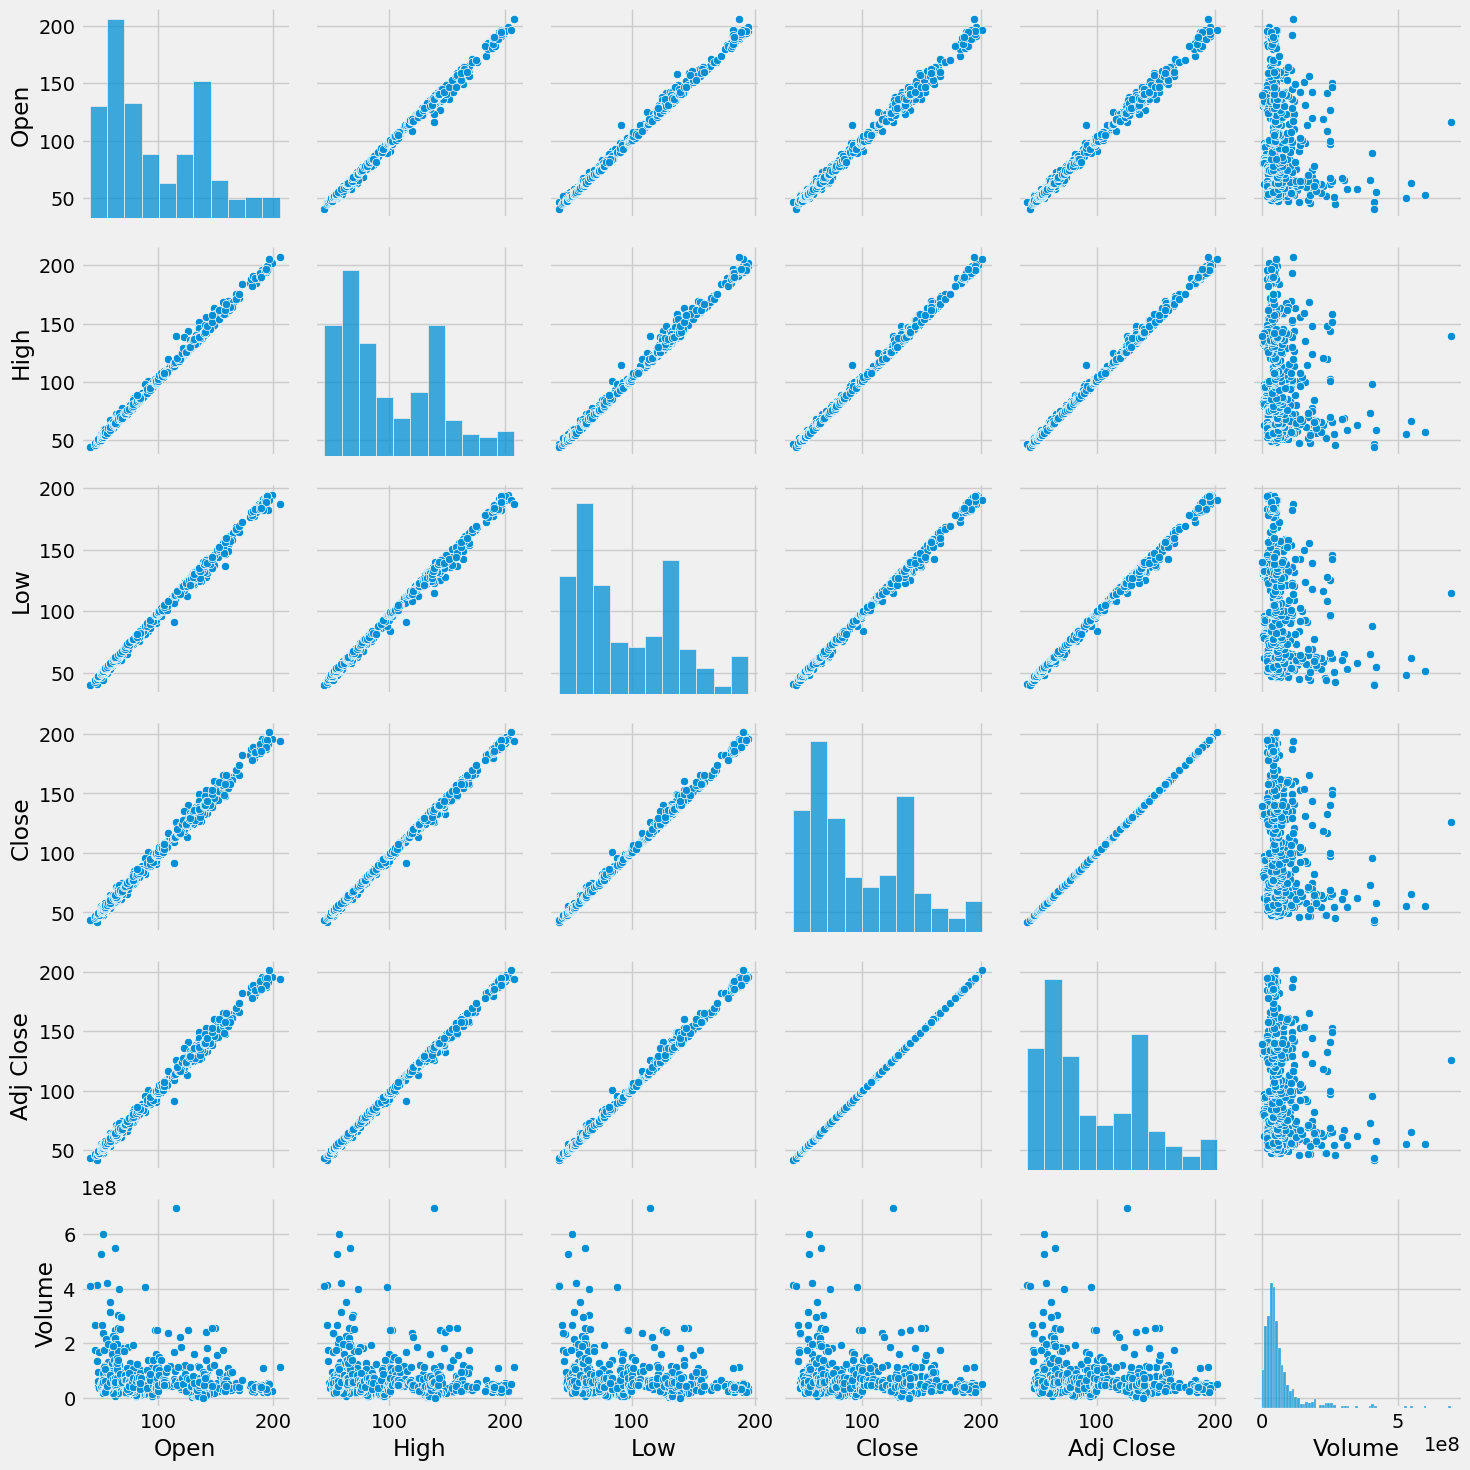

In [9]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Create pairplot
sns.pairplot(numeric_df)

<Axes: >

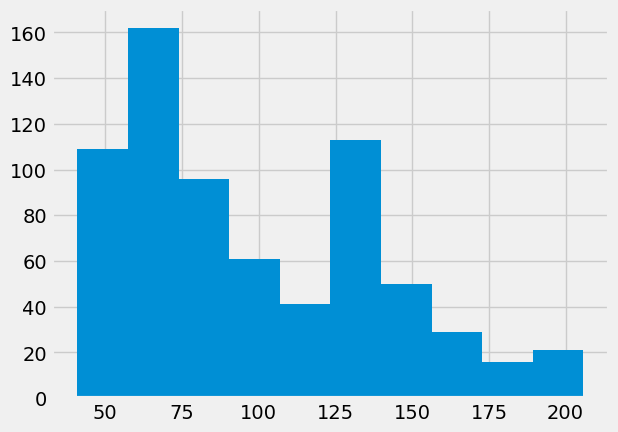

In [10]:
df['Open'].hist()

<Axes: >

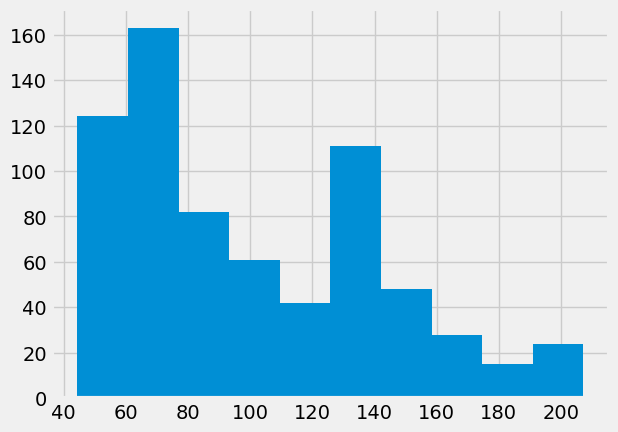

In [11]:
df['High'].hist()

<Axes: >

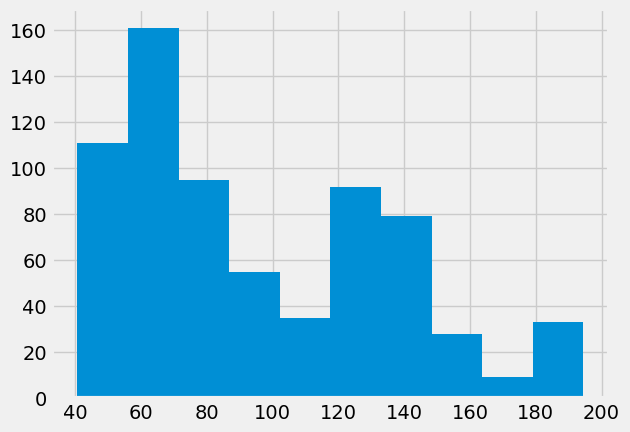

In [12]:
df['Low'].hist()

<Axes: >

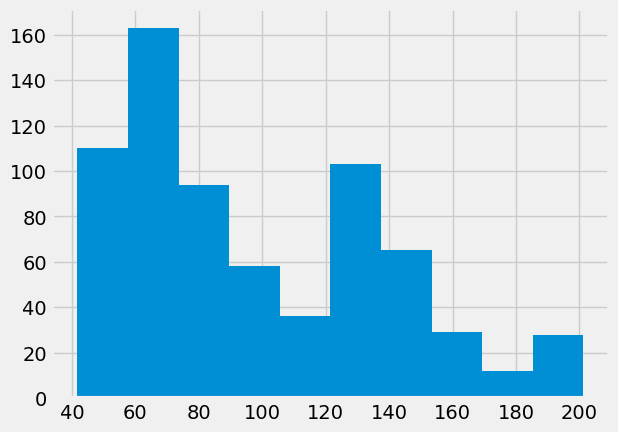

In [13]:
df['Close'].hist()

<Axes: >

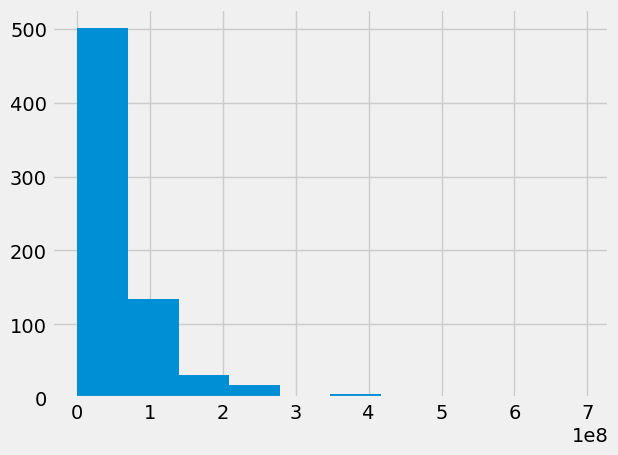

In [14]:
df['Volume'].hist()

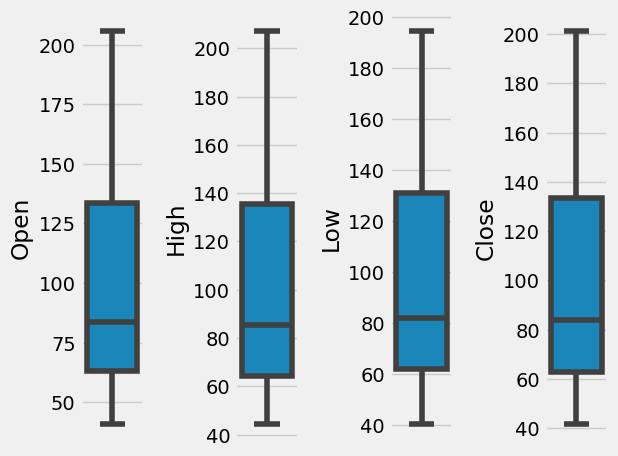

In [15]:
f, axes= plt.subplots(1,4)
sns.boxplot(y ='Open', data=df, ax=axes[0])
sns.boxplot(y ='High', data=df, ax=axes[1])
sns.boxplot(y ='Low', data=df, ax=axes[2])
sns.boxplot(y ='Close', data=df, ax=axes[3])
plt.tight_layout()

In [16]:
import plotly.graph_objects as go
figure = go.Figure(data= [go.Candlestick(x=df["Date"], 
                                         open=df["Open"], high=df["High"], 
                                         low=df["Low"], close=df["Close"])])
figure.update_layout(title = "Zomato Stock Price Candlestick Chart", xaxis_rangeslider_visible = False)
figure.show()

In [17]:
future_days = 5

In [18]:
#create a new column 
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)

#show the data 
df[['Close', str(future_days) + '_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2021-07-23,126.000000,133.500000
2021-07-26,140.649994,139.699997
2021-07-27,132.899994,139.399994
2021-07-28,131.199997,138.399994
2021-07-29,141.550003,134.949997
...,...,...
2024-05-15,192.000000,NaN
2024-05-16,195.199997,NaN
2024-05-17,194.850006,NaN
2024-05-21,189.100006,NaN


In [19]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[126.      ]
 [140.649994]
 [132.899994]
 [131.199997]
 [141.550003]
 [133.5     ]
 [139.699997]
 [139.399994]
 [138.399994]
 [134.949997]
 [131.350006]
 [130.600006]
 [125.199997]
 [135.649994]
 [135.449997]
 [137.350006]
 [134.949997]
 [132.5     ]
 [134.949997]
 [139.300003]
 [127.25    ]
 [125.      ]
 [124.25    ]
 [125.849998]
 [124.699997]
 [133.550003]
 [134.550003]
 [132.600006]
 [137.600006]
 [149.75    ]
 [144.050003]
 [140.050003]
 [141.25    ]
 [141.600006]
 [143.149994]
 [144.100006]
 [142.649994]
 [142.050003]
 [137.899994]
 [134.300003]
 [133.449997]
 [132.100006]
 [137.300003]
 [136.649994]
 [143.699997]
 [139.      ]
 [138.5     ]
 [136.600006]
 [138.      ]
 [139.100006]
 [137.949997]
 [134.949997]
 [137.100006]
 [136.149994]
 [136.850006]
 [136.600006]
 [135.449997]
 [135.      ]
 [144.050003]
 [138.550003]
 [137.899994]
 [138.149994]
 [137.75    ]
 [132.699997]
 [135.449997]
 [134.800003]
 [135.600006]
 [131.550003]
 [132.649994]
 [132.449997]
 [128.350006]
 [131.

In [20]:
 y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[133.5      139.699997 139.399994 138.399994 134.949997 131.350006
 130.600006 125.199997 135.649994 135.449997 137.350006 134.949997
 132.5      134.949997 139.300003 127.25     125.       124.25
 125.849998 124.699997 133.550003 134.550003 132.600006 137.600006
 149.75     144.050003 140.050003 141.25     141.600006 143.149994
 144.100006 142.649994 142.050003 137.899994 134.300003 133.449997
 132.100006 137.300003 136.649994 143.699997 139.       138.5
 136.600006 138.       139.100006 137.949997 134.949997 137.100006
 136.149994 136.850006 136.600006 135.449997 135.       144.050003
 138.550003 137.899994 138.149994 137.75     132.699997 135.449997
 134.800003 135.600006 131.550003 132.649994 132.449997 128.350006
 131.350006 131.149994 137.649994 136.050003 140.899994 153.
 160.300003 157.600006 156.550003 154.699997 149.75     148.699997
 155.5      159.75     148.149994 149.100006 152.550003 151.399994
 150.649994 144.899994 138.550003 139.800003 147.600006 146.25
 140.550003 14

In [21]:
#split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [23]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:',svr_rbf_confidence)

svr_rbf accuracy: 0.9762348087984313


In [24]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 52.98152077 136.55792804 156.11092489 138.24316496  80.06198153
  54.87406123 126.03023659  78.07113934 162.6923386   63.58405861
  94.6069952   55.01310011 145.30214482 126.85476702  79.46385601
  52.93553861  54.04141288 140.17959462  54.64249428  82.66206707
 131.07391177 141.75579345 133.69125717  84.31875057  58.60734983
  55.24500482 122.57408061 114.10194502 105.48330844  74.65716721
 161.22823772  84.72110425  63.63185302 127.42141516  51.92622785
  79.91238213 116.84054661  73.08309235  74.55861356  99.46807852
 122.93539294 158.72664492  63.01108186 140.73926835  76.58356474
  48.24749491 192.3408331  145.04945842 142.82162676  64.25385515
  54.13379557 122.41921763  56.87417766 120.61197384  83.91667481
 156.11092489 141.85736006  64.06233925  75.64398711  72.64148366
  67.14017075  74.70645765  69.51557265 100.08374822 128.24528249
 188.48337126  48.83386766  56.54753402  54.04141288  81.96075291
 115.80708184  69.8562049   64.15808421 160.93474432  57.34150955
 140.58666

In [25]:
print(y_test)

[ 53.950001 132.449997 162.100006 135.        86.800003  58.75
 132.5       75.849998 152.75      60.950001  98.199997  58.349998
 132.699997 133.5       79.849998  48.150002  57.75     137.949997
  56.        78.75     139.550003 144.100006 137.649994  83.900002
  65.699997  64.25     112.949997  90.400002 106.050003  74.800003
 174.199997  86.550003  67.099998 132.75      47.75      81.300003
 119.949997  82.550003  82.199997  99.900002 113.25     164.199997
  58.849998 130.100006  78.699997  48.75     191.449997 149.449997
 137.899994  58.950001  43.950001 124.150002  54.349998 123.599998
  82.199997 158.25     139.699997  57.799999  74.849998  67.150002
  70.199997  74.75      64.300003  99.449997 123.699997 188.100006
  46.299999  52.700001  51.799999  80.849998 118.550003  63.950001
  63.75     150.649994  58.049999 125.199997  49.349998  65.400002
 131.300003 129.449997  54.799999  53.75      53.299999  61.75
  70.        56.049999  63.950001  62.200001  53.950001 130.25
  60.84

C:\Users\siddh\AppData\Local\Temp\ipykernel_1956\431140670.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: ylabel='Density'>

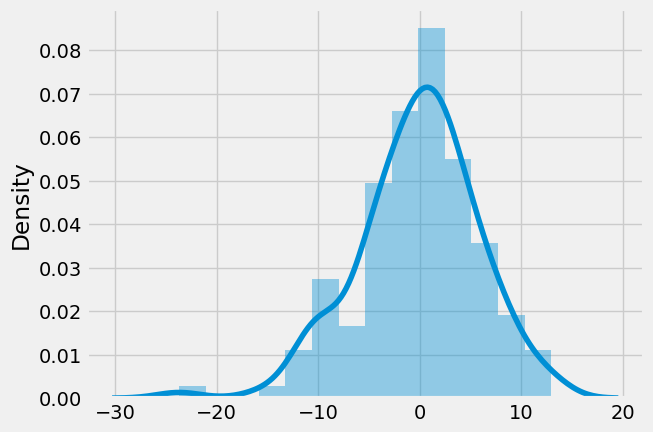

In [26]:
residual = y_test - svm_prediction
sns.distplot(residual)

In [27]:
#Model Accuracy

x2 = abs(svm_prediction - y_test)
y2 = 100 * (x2/ y_test)
accuracy = 100 - np.mean(y2)
print("Accuracy: ", round(accuracy, 2), "%.")

Accuracy:  94.84 %.


Mean Absolute Error:  4.493442519855643
Mean Squared Error:  34.73340056470721
Root Mean Absolute Error:  2.119774167182826


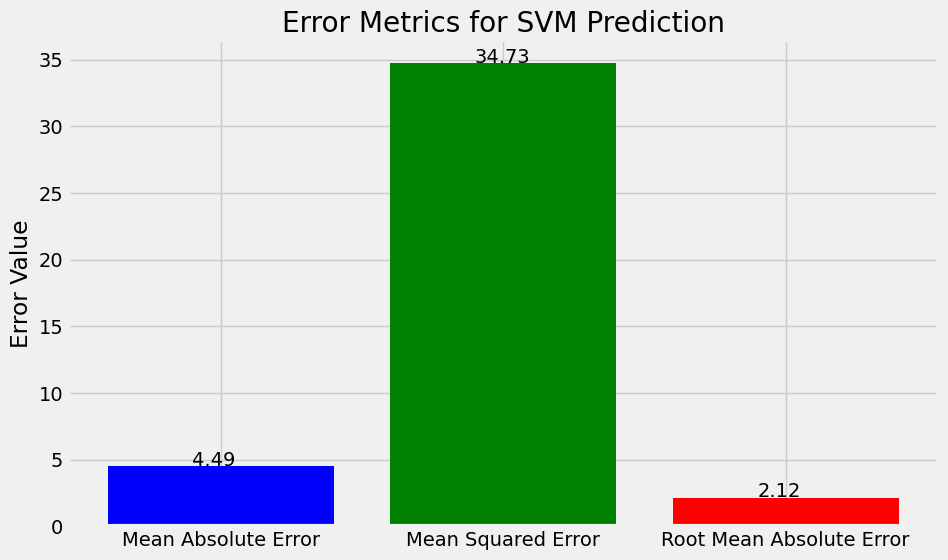

In [28]:
#calculating visualizing mae , mse, rmae 
import math
from sklearn import metrics


mean_absolute_error = metrics.mean_absolute_error(y_test, svm_prediction)
mean_squared_error = metrics.mean_squared_error(y_test, svm_prediction)
root_mean_absolute_error = math.sqrt(mean_absolute_error)

# Print the error metrics
print("Mean Absolute Error: ", mean_absolute_error)
print("Mean Squared Error: ", mean_squared_error)
print("Root Mean Absolute Error: ", root_mean_absolute_error)

# Data for plotting
errors = {
    'Mean Absolute Error': mean_absolute_error,
    'Mean Squared Error': mean_squared_error,
    'Root Mean Absolute Error': root_mean_absolute_error
}

# Extract keys and values
metrics_names = list(errors.keys())
metrics_values = list(errors.values())

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red'])

# Adding title and labels
plt.title('Error Metrics for SVM Prediction')
plt.ylabel('Error Value')

# Annotating the bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, round(yval, 2))

plt.show()

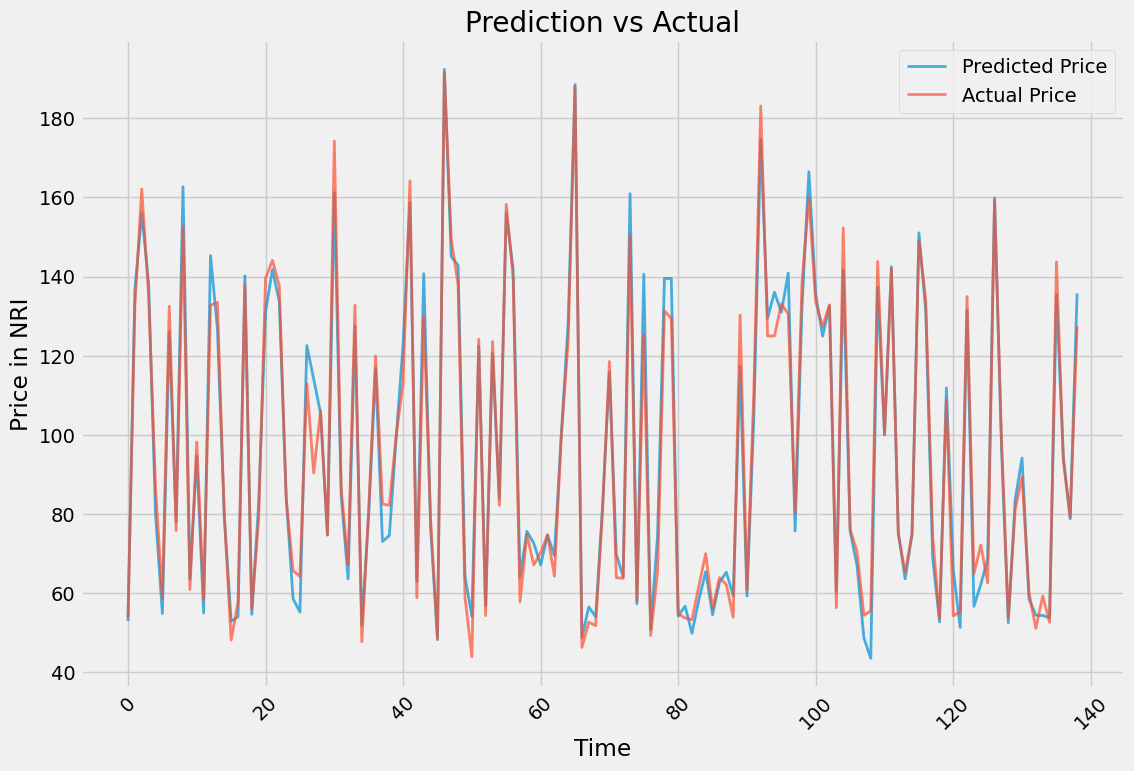

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(svm_prediction , label='Predicted Price', lw=2, alpha=.7)
plt.plot(y_test , label='Actual Price', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in NRI')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()